In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers
from tensorlfow.keras import 
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/train.csv")
df.drop('Id', axis=1, inplace=True)

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


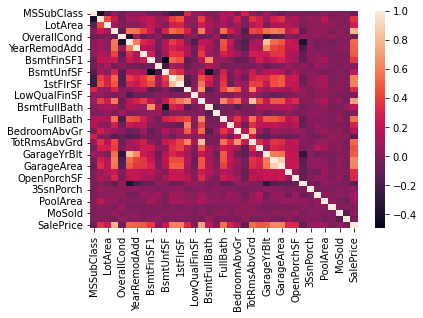

In [ ]:
sns.heatmap(df.corr())

In [ ]:
null_values = df.isna().sum().reset_index().sort_values(0, ascending=False)
null_cols = null_values[null_values[0] != 0]["index"].to_list()

In [ ]:
# Dropping columns with nan values
df.drop(null_cols, axis=1, inplace=True)

In [ ]:
X = df.drop(['SalePrice'], axis=1)
y = df["SalePrice"]

In [ ]:
#The list of categorical columns
cat_cols = list(X.select_dtypes(include=['object']).dtypes.index)

In [ ]:
#list of numerical columns
num_cols = list(X.select_dtypes(exclude = ['object']).dtypes.index)

In [ ]:
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
numeric_transformer = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
                ("cat", categorical_transformer, cat_cols),
                ("num", numeric_transformer, num_cols)
    ]
)



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
#Adding layers to the neural network sequentially
model = keras.Sequential(
    [
        #layers.Dense(512, activation="relu"),
        #layers.Dense(256, activation="relu"),
        #layers.Dense(128, activation="relu"),
        #layers.Dense(16, activation="relu"),
        layers.Dense(1),
    ]
)


In [ ]:
model.summary()

In [ ]:
import tensorflow as tf

In [ ]:
model.compile(
    optimizer='sgd',
    loss='mse')



In [ ]:
history = model.fit(
    X_train.toarray(),
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_test.toarray(), y_test)
)

Epoch 1/10
37/37 [==============================] - 0s 4ms/step - loss: 1184971392.0000 - val_loss: 1531598720.0000
Epoch 2/10
37/37 [==============================] - 0s 3ms/step - loss: 1154552704.0000 - val_loss: 1517995904.0000
Epoch 3/10
37/37 [==============================] - 0s 3ms/step - loss: 1105443456.0000 - val_loss: 1542910464.0000
Epoch 4/10
37/37 [==============================] - 0s 3ms/step - loss: 1075108992.0000 - val_loss: 1496519552.0000
Epoch 5/10
37/37 [==============================] - 0s 3ms/step - loss: 1051558656.0000 - val_loss: 1489975936.0000
Epoch 6/10
37/37 [==============================] - 0s 3ms/step - loss: 1024592960.0000 - val_loss: 1724521088.0000
Epoch 7/10
37/37 [==============================] - 0s 3ms/step - loss: 1019231232.0000 - val_loss: 1486215808.0000
Epoch 8/10
37/37 [==============================] - 0s 3ms/step - loss: 991028864.0000 - val_loss: 1482215552.0000
Epoch 9/10
37/37 [==============================] - 0s 3ms/step - loss: 9

Text(0, 0.5, 'MSE Loss')

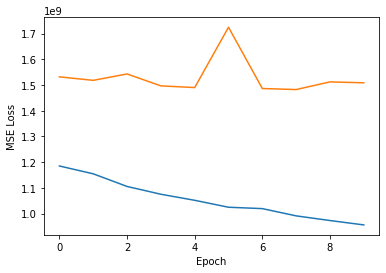

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')